Загрузка данных и подготовка для работы

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy() / 255.0
y = mnist.target.astype(int).to_numpy()

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

def one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

Y_train = one_hot(y_train)
Y_test = one_hot(y_test)



Форма X_train: (60000, 784)
Форма Y_train: (60000, 10)


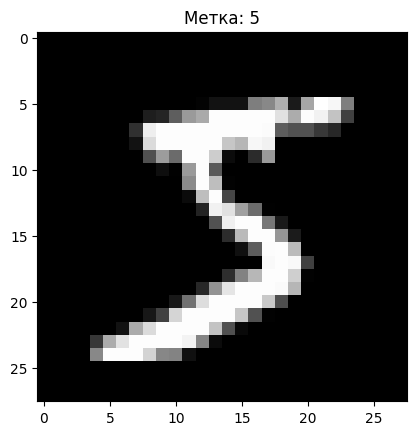

In [ ]:
print("Форма X_train:", X_train.shape)
print("Форма Y_train:", Y_train.shape)


import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Метка: {y_train[0]}")
plt.show()


In [3]:
def initialize_params(input_size, hidden_size, output_size):
    np.random.seed(42) 
    
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    
    b1 = np.zeros((1, hidden_size))

    
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    
    b2 = np.zeros((1, output_size))

    
    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return params




def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)



def forward_pass(X, params):

    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]

    Z1 = np.dot(X, W1) + b1       
    A1 = relu(Z1)                  

   
    Z2 = np.dot(A1, W2) + b2       
    A2 = softmax(Z2)               

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [4]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m
    return loss


def backward_pass(X, y_true, params, cache):
    m = X.shape[0]
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    A1, A2 = cache["A1"], cache["A2"]


    dZ2 = A2 - y_true                 
    dW2 = np.dot(A1.T, dZ2) / m       
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (cache["Z1"] > 0)     
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads


def update_params(params, grads, learning_rate):

    for key in params.keys():
        params[key] -= learning_rate * grads["d" + key]
    return params


In [5]:
def one_hot_encode(y, num_classes=10):
    y_encoded = np.zeros((y.size, num_classes))
    y_encoded[np.arange(y.size), y] = 1
    return y_encoded


def train(X_train, y_train, X_test, y_test, params, epochs=20, batch_size=64, learning_rate=0.1):


    y_train_oh = one_hot_encode(y_train)
    

    n_train = X_train.shape[0]
    history = []

    for epoch in range(epochs):
        indices = np.random.permutation(n_train)
        X_train = X_train[indices]
        y_train_oh = y_train_oh[indices]

        total_loss = 0
        correct = 0


        for i in range(0, n_train, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train_oh[i:i+batch_size]


            y_pred, cache = forward_pass(X_batch, params)


            loss = compute_loss(y_batch, y_pred)
            total_loss += loss


            predictions = np.argmax(y_pred, axis=1)
            labels = np.argmax(y_batch, axis=1)
            correct += np.sum(predictions == labels)


            grads = backward_pass(X_batch, y_batch, params, cache)

            params = update_params(params, grads, learning_rate)


        accuracy = correct / n_train
        avg_loss = total_loss / (n_train // batch_size)
        history.append((accuracy, avg_loss))

        print(f"Эпоха {epoch+1}/{epochs} — Потеря: {avg_loss:.4f} — Точность: {accuracy*100:.2f}%")

    return params, history


In [6]:
def evaluate(X_test, y_test, params):
    y_pred, _ = forward_pass(X_test, params)
    predictions = np.argmax(y_pred, axis=1)
    accuracy = np.mean(predictions == y_test)
    print(f"Точность на тестовых данных: {accuracy*100:.2f}%")
    return accuracy


In [7]:

input_size = 784
hidden_size = 300
output_size = 10


params = initialize_params(input_size, hidden_size, output_size)


params, history = train(
    X_train, y_train,
    X_test, y_test,
    params,
    epochs=20,
    batch_size=64,
    learning_rate=0.1
)


evaluate(X_test, y_test, params)


Эпоха 1/20 — Потеря: 0.3603 — Точность: 90.01%
Эпоха 2/20 — Потеря: 0.1894 — Точность: 94.66%
Эпоха 3/20 — Потеря: 0.1391 — Точность: 96.03%
Эпоха 4/20 — Потеря: 0.1114 — Точность: 96.84%
Эпоха 5/20 — Потеря: 0.0927 — Точность: 97.40%
Эпоха 6/20 — Потеря: 0.0793 — Точность: 97.83%
Эпоха 7/20 — Потеря: 0.0689 — Точность: 98.09%
Эпоха 8/20 — Потеря: 0.0606 — Точность: 98.35%
Эпоха 9/20 — Потеря: 0.0533 — Точность: 98.60%
Эпоха 10/20 — Потеря: 0.0481 — Точность: 98.73%
Эпоха 11/20 — Потеря: 0.0431 — Точность: 98.89%
Эпоха 12/20 — Потеря: 0.0389 — Точность: 99.04%
Эпоха 13/20 — Потеря: 0.0351 — Точность: 99.17%
Эпоха 14/20 — Потеря: 0.0319 — Точность: 99.25%
Эпоха 15/20 — Потеря: 0.0290 — Точность: 99.33%
Эпоха 16/20 — Потеря: 0.0265 — Точность: 99.42%
Эпоха 17/20 — Потеря: 0.0241 — Точность: 99.50%
Эпоха 18/20 — Потеря: 0.0219 — Точность: 99.56%
Эпоха 19/20 — Потеря: 0.0203 — Точность: 99.64%
Эпоха 20/20 — Потеря: 0.0186 — Точность: 99.69%
Точность на тестовых данных: 98.18%


np.float64(0.9818)